<img src='img/fastcamp_h.png'>

# 9강. Dimensionality reduction (PCA)

# 이번장에서 배우는 것들
* 차원 축소의 개념
* z-score
* PCA
* encoding, decoding


# 적절한 차원과 성능

* 1차원 feature를 통하여 개와 고양이를 분류하고 싶음
* 1차원 feature에 개와 고양이를 매핑 시킨 그림은 다음과 같음
* 축에 개와 고양이가  섞여 있어 분류하기 어려워 보임을 알 수 있음
* 이런 경우 우리는 개와 고양이를 효과적으로 분류 할 수 없음

<center><img src='img/09_02.png'></center>

# 2차원 feature 추가를 통한 분포 변경

* 2차원 feature를 추가 한 후 개와 고양이를 매핑 시킨 그림은 다음과 같음
* feature 1의 개, 고양이는 그대로이지만 feature 2 축으로 개와 고양이가 분산되어짐을 볼 수 있음

<center><img src='img/09_03.png'></center>

* 그러나 2차원으로도 개와 고양이가 어느 정도 섞여 있어 성능 높은 선형 분류를 하기 어려워보임
* 1차원에 2차원 feature를 더해서 문제를 바꾼 것 처럼 2차원에 3차원 feature를 추가 해 볼 수 있음

<center><img src='img/09_05.png'></center>

# 3차원 feature 추가를 통한 분포 변경

* 3차원 feature를 추가 한 후 개와 고양이를 매핑 시킨 그림은 다음과 같음
* feature 3축을 기준으로 개와 고양이가 더욱 떨어진 것을 확인 할 수 있음

<center><img src='img/09_06.png'></center>

# 3차원에서 선형 분류

* 다음과 같이 대각선 평면을 이용하여 개와 고양이를 분류 할 수 있음
* 지금까지 보아 온 것처럼 보통 축을 추가하면 데이터들을 새로운 시각에서 분류하는 것이 가능해짐

<center><img src='img/09_07.png'></center>

# 차원의 저주

* 고차원은 언제나 올바른 방법인가?
* 차원을 추가하는 것은 언제나 쉽고 맞는 방법인가?

<center><img src='img/09_08.png'></center>

* 각 차원의 데이터를 유니크하게 구분하기 위해서는 차원이 늘어날 수록 훨씬 더 많은 데이터가 필요하게 됨
* 차원이 증가하면 각 알고리즘의 컴퓨팅 파워도 급격히 증가하게 됨
* 데이터가 커지면 필요 메모리와 용량도 증가하게 됨

<center><img src='img/09_01.png'></center>

* 결과적으로 차원이 적당하게 늘어나면 성능이 증가하지만 그 후로는 급격히 감소함 (크게 데이터 부족)

# Dimensionality reduction

* 주어진 데이터를 효과적으로 나타내는 차원을 남기고 다른 차원을 줄이거나 합치는 것

### 얻어지는 효과
* 같은 규모의 데이터셋의 용량을 축소 할 수 있음
* 컴퓨팅 파워 감소
* 가시적으로 데이터를 파악하기 용이해짐

# PCA (principal component analysis)

* LDA (Linear Discriminant Analysis) 와 함께 가장 대표적인 차원축소 알고리즘
* 원하는 개수의 축소된 차원으로 현재 차원을 줄일 수 있음

<center><img src='img/09_09.png' height=50% width=50%></center>

# z-score

$$ \mu = 평균 \nonumber $$
$$ \sigma = 표준편차 \nonumber $$
$$ z = \frac{X - \mu}{\sigma} \nonumber $$

* 스케일이 다른 데이터 집단을 평균을 중심으로 어느정도 떨어져있는지 재정렬함

<center><img src='img/09_11.png' height=50% width=50%></center>

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'국어':[110, 52, 53, 75, 35],'수학':[64, 79, 32, 56, 67]})
df

,국어,수학
0,110,64
1,52,79
2,53,32
3,75,56
4,35,67


In [2]:
from scipy.stats import zscore
df.apply(zscore)

,국어,수학
0,1.741624,0.281083
1,-0.503136,1.239319
2,-0.464433,-1.763155
3,0.387028,-0.229977
4,-1.161083,0.472730


# PCA 알고리즘

* 주어진 데이터 셋을 z-score로 변환
* 데이터셋에서 분산이 최대인 축을 mse로 탐색 (pc1)
* 분산이 최대인 축(pc1)을 찾으면 pc1과 직교하는 다른 차원의 분산이 최대인 축을 찾음(pc2)
* pc1과 pc2에 직교하는 3번째 pc3을 찾음 .. (반복)

<center><img src='img/09_10.png' height=50% width=50%></center>
<center><img src='img/09_01.gif' height=50% width=50%></center>

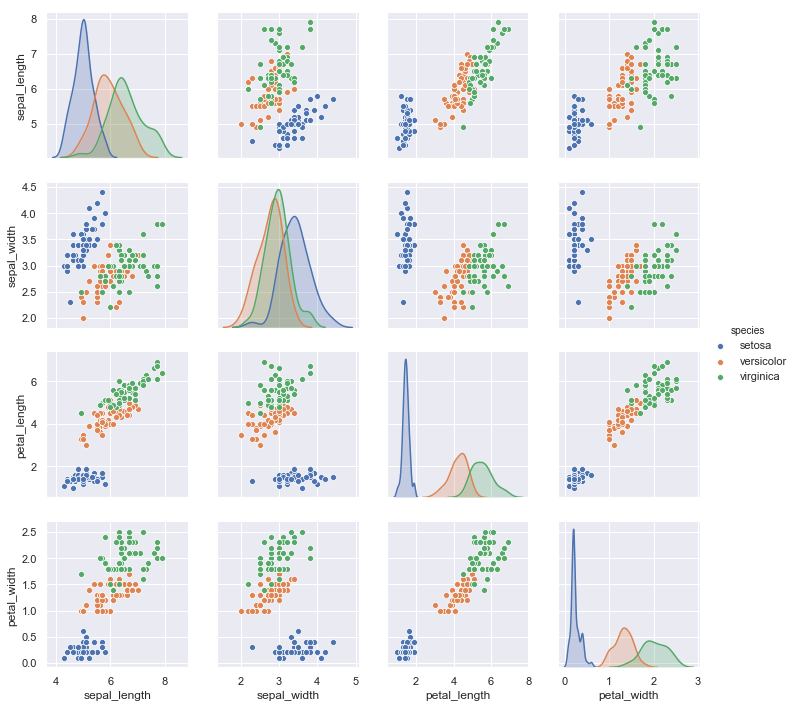

In [55]:
import seaborn as sns
iris = sns.load_dataset("iris")

sns.set()
g = sns.pairplot(iris, hue="species")

In [23]:
iris.iloc[:,:-1].head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
#iris 데이터에 pca를 수행함
pca = PCA()
pca.fit(iris.iloc[:,:-1])

#explained_variance_ratio_는 각 pc축이 기존 자료를 어느정도 설명할 수 있는가를 비율로 나타냄
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

Text(0, 0.5, 'Cumulative explained variance')

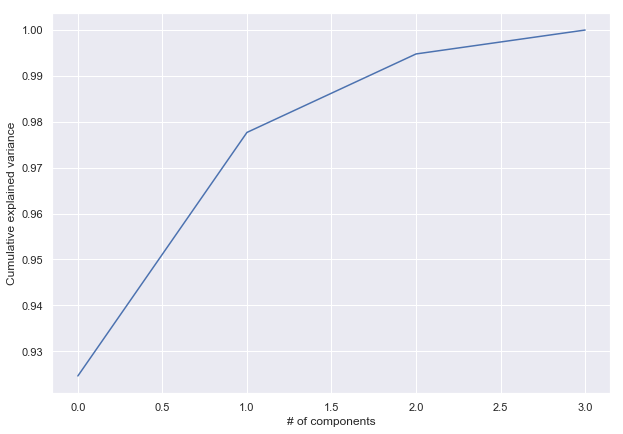

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')

In [33]:
#iris의 y축의 경우 categorical 데이터이기 때문에 수치적 의미가 없음
#scatter 그래프에 표현해주기 위하여 label을 수치로 변경
iris.species.head(5)

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [29]:
pd.Categorical(iris.species).codes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

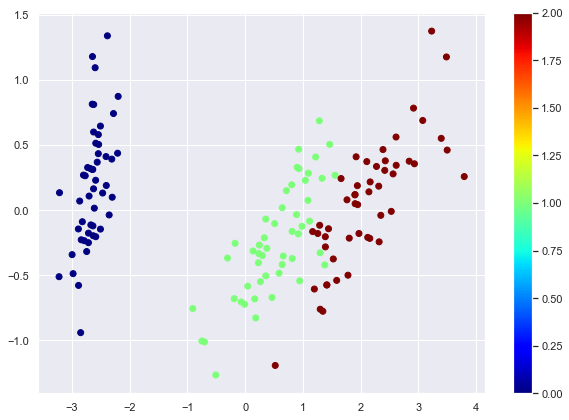

In [34]:
#iris의 경우 4차원 데이터지만 실제 2개의 pc축을 사용하면 데이터의 99% 이상을 설명가능함
import matplotlib.pyplot as plt
plt.scatter(x=encoded[:,0], y=encoded[:,1], c=pd.Categorical(iris.species).codes, cmap='jet')
plt.colorbar()
plt.show()

# 압축률 계산

* 기존 iris의 X 데이터는 4차원 배열 * 150행, 각 데이터를 32bit float이라고 가정하면 4 * 150 * 32bit = 19200bit
* pca 압축된 X 데이터는 2차원 배열 * 150행, 각 데이터를 32bit float이라고 가정하면 4 * 150 * 32bit = 9600bit
* 압축률 50%로 손실은 거의 없음을 확인 할 수 있음

In [39]:
#pca 구하기
from keras.datasets import mnist
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28 * 28)) /255.

from sklearn.decomposition import PCA

# 28 * 28 dimension을 가진 mnist를 3차원으로 투영
pca = PCA(n_components=3)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
#pc별 분산 비율을 획득
print(pca.explained_variance_ratio_)
#약 17%의 분산을 설명할 수 있음
print(np.sum(pca.explained_variance_ratio_))

[0.09704664 0.07095924 0.06169089]
0.2296967716868205


In [41]:
# 28 * 28 개의 pc를 보면 100% 분산 설명가능
pca_full = PCA(n_components=28 * 28)
pca_full.fit(x_train)
print(np.sum(pca_full.explained_variance_ratio_))

1.0


In [42]:
# 28 * 28 차원을 3차원으로 축소
encoded = pca.transform(x_train)
print(encoded.shape, x_train.shape, y_train.shape)

(60000, 3) (60000, 784) (60000,)


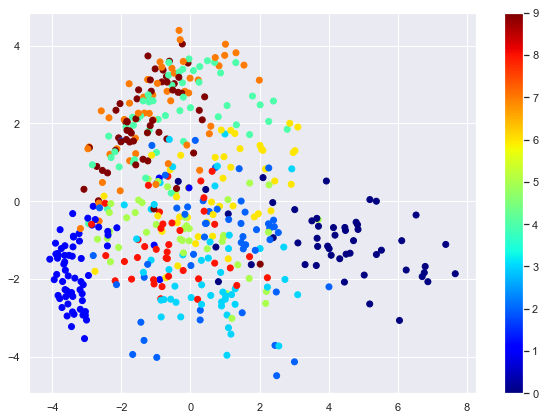

In [43]:
import matplotlib.pyplot as plt
plt.scatter(x=encoded[:500,0], y=encoded[:500,1], c=y_train[:500], cmap='jet')
plt.colorbar()
plt.show()

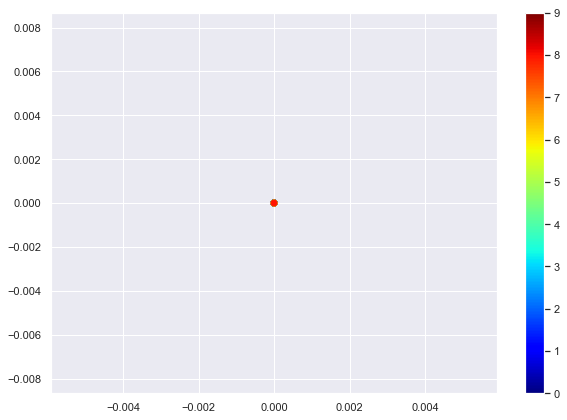

In [44]:
plt.scatter(x=x_train[:500,0], y=x_train[:500,1], c=y_train[:500], cmap='jet')
plt.colorbar()
plt.show()

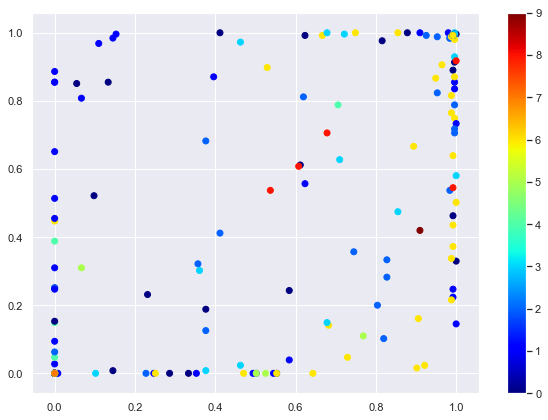

In [45]:
plt.scatter(x=x_train[:500,128], y=x_train[:500,129], c=y_train[:500], cmap='jet')
plt.colorbar()
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

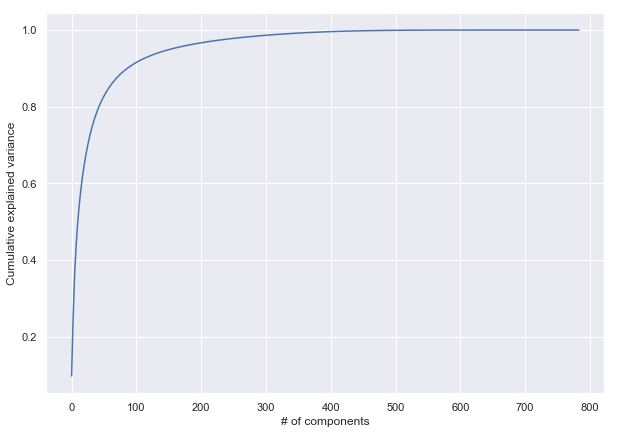

In [58]:
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')

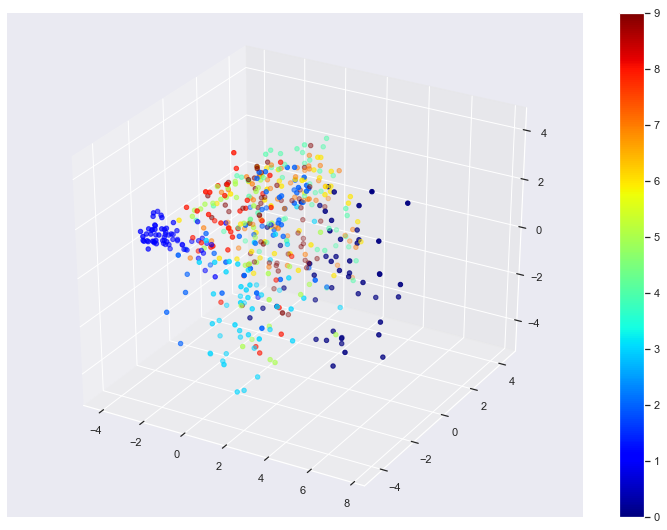

In [47]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
p = ax.scatter(xs=encoded[:500,0], ys=encoded[:500,1], zs=encoded[:500,2], c=y_train[:500], cmap='jet')
plt.colorbar(p)
plt.show()

# 압축과 복원

* pca의 장점은 데이터를 압축할 수 있는 것만이 아님
* 압축된 데이터에서 원본 데이터를 손실을 감안하고 복구해 낼 수 있음

<center><img src='img/09_13.png' height=100% width=100%></center>

In [56]:
#x를 복호화
recoded = pca.inverse_transform(encoded)
print(recoded.shape)

(60000, 784)


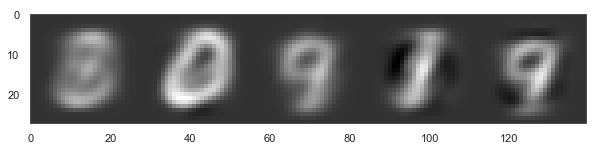

In [57]:
plt.imshow(np.concatenate(recoded.reshape((-1, 28,28))[:5], axis=1), cmap='gray')
plt.grid(False)
plt.show()

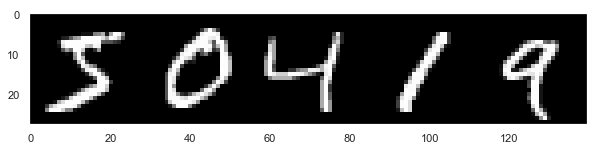

In [50]:
plt.imshow(np.concatenate(x_train.reshape((-1, 28,28))[:5], axis=1), cmap='gray')
plt.grid(False)
plt.show()

In [51]:
pca_90 = PCA(n_components=0.9)
pca_90.fit(x_train)
encoded_90 = pca_90.transform(x_train)
print(encoded_90.shape)

(60000, 87)


In [52]:
recoded_90 = pca_90.inverse_transform(encoded_90)
print(recoded_90.shape)

(60000, 784)


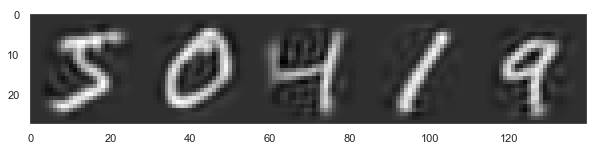

In [53]:
plt.imshow(np.concatenate(recoded_90.reshape((-1, 28,28))[:5], axis=1), cmap='gray')
plt.grid(False)
plt.show()

# 압축률 계산

* 기존 keras의 X 데이터는 784차원 배열 * 60000행, 각 데이터를 32bit float이라고 가정하면 784 * 60000 * 32bit = 약180mb
* pca 압축된 X 데이터는 87차원 배열 * 60000행, 각 데이터를 32bit float이라고 가정하면 4 * 150 * 32bit = 약20mb
* 압축률 약 90%로 손실을 포함하여도 원래 데이터가 뭔지 알아보는데 무리가 없음을 확인 할 수 있음